## 1. Importing Libraries And Data

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

# plotting
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [127]:
df = pd.read_csv('C:/Users/zaida/Downloads/credit_card_dataset/creditcard.csv')

## 2. Exploratory Data Analysis

In [128]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [129]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


C:\Users\zaida\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

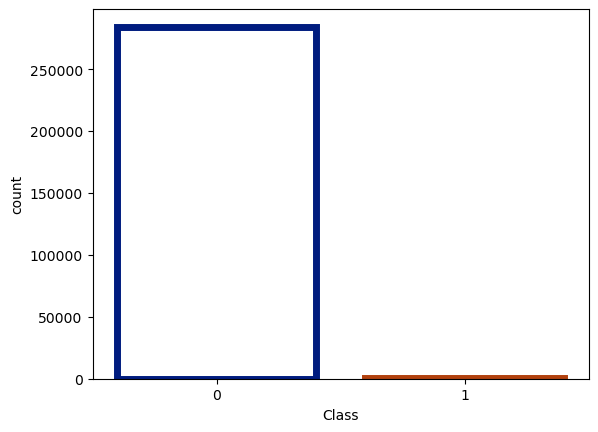

In [130]:
# To check the count of fraudulent and normal transactions
sns.countplot(df['Class'],facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3), label = "Count")

In [131]:
# Now Checking actual number of fraudulent transactions
fraud_indices=np.array(df[df.Class==1].index)
no_records_fraud=len(fraud_indices)
normal_indices=np.array(df[df.Class==0].index)
no_records_normal=len(normal_indices)

print("No. of Fraudulent Transaction is {} and No. of Normal Transaction is {}".format(no_records_fraud, no_records_normal))

No. of Fraudulent Transaction is 492 and No. of Normal Transaction is 284315


## 3. Preprocessing

In [132]:
df['normalized_amount']=StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
# Dropping the actual Amount column from the dataset.
df = df.drop(['Amount'],axis=1)

In [133]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [134]:
# Time is the irrelevant column so we are dropping the Time column from dataset.
df = df.drop(['Time'],axis=1)

In [135]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### Overfitting - Applying SMOTE

In [136]:
from imblearn.over_sampling import SMOTE

In [137]:
X_resample,y_resample=SMOTE().fit_resample(X,y.values.ravel())

In [138]:
# Assigning X and Y
y_resample=pd.DataFrame(y_resample)
X_resample=pd.DataFrame(X_resample)

### Splitting data into Train and Test set

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3, random_state=0)

In [140]:
X_train.shape

(398041, 29)

In [141]:
X_test.shape

(170589, 29)

In [142]:
X_train = np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

## 4. Building The Model

### Train Multi-layer Perceptron Classifier - Deep Learning

In [1]:
model1 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)

NameError: name 'MLPClassifier' is not defined

In [ ]:
model1.fit(X_train, y_train, epochs=15, batch_size=64)

### Train Random Forest Classifier - Machine Learning

In [150]:
model2 = RandomForestClassifier(n_estimators=100, random_state=42)

### Optimization - Applying grid search as the hyperparameter

In [154]:
param_grid_mlpc = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'alpha': [0.001, 0.01, 0.05],
    'learning_rate': ['constant','adaptive']
}

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 3, 5],
    'max_features': ['auto', 'sqrt']
}

#### MLPClassifier optimization

In [155]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

model1 = MLPClassifier()
grid_search_mlpc = GridSearchCV(estimator=model1,
                               param_grid=param_grid_mlpc,
                               cv=5, n_jobs=-1, verbose=1)
grid_search_mlpc.fit(X_train, np.argmax(y_train, axis=1))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive']},
             verbose=1)

In [156]:
print(grid_search_mlpc.best_params_)

{'alpha': 0.001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant'}


In [157]:
# Apply the best hyperparameter to the MLPC model
model1 = MLPClassifier(**grid_search_mlpc.best_params_)

#### Random Forest Optimization

In [ ]:
model2 = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=model2,
                              param_grid=param_grid_rf,
                              cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, np.argmax(y_train, axis=1))

In [ ]:
print(grid_search_rf.best_params_)

In [ ]:
# Apply the best hyperparameters to the RF model
model2 = MLPClassifier(**grid_search_mlpc.best_params_)

## 5. Make Predictions on The Test Set

In [ ]:
# Use base models (DL & ML) to make predictions on the test set
predictions1 = model1.predict(X_test)
predictions1 = np.argmax(predictions1, axis=1)
predictions2 = model2.predict(X_test)

In [ ]:
# Combine the predictions from the base models with the original features of the test set
X_test_hybrid = np.column_stack((X_test, predictions1, predictions2))

## 6. Build and Train The Hybrid Model

In [ ]:
# Train the hybrid model on the new dataset
model3 = LogisticRegression()
model3.fit(X_test_hybrid, np.argmax(y_test, axis=1))

In [ ]:
# Use the Hybrid model to make predictions on the test set
predictions = model3.predict(X_test_hybrid)

## 7. Performance Evaluation

In [ ]:
#plot results of model chosen
confusion_matrix_result = confusion_matrix(y_test, predictions)

print('Result Model')
print(classification_report(y_test, predictions))

print('Confusion matrix Model')
fig, ax = plot_confusion_matrix(conf_mat = confusion_matrix_result)
plt.show()